In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import seaborn as sns

from scipy.signal import butter, filtfilt 
from scipy import interpolate
from scipy.interpolate import splrep, splev

In [2]:
test1 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/2020년 석사과정 1학기/Advanced Computer Networking(4)/프로젝트/dataset - lpf 거침/LR/1/test_3.csv',
                    names=['time','A','B','C','D','lpf_A','lpf_B','lpf_C','lpf_D','none'])
data_1 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/LR_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])
data_2 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/RL_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])
data_3 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/CW_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])
data_4 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/CCW_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])
data_5 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/DOWN_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])
data_6 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/UP_100/0.csv', names=['num','A','B','C','D','A-B','C-D','n1','n2'])

nan_example = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/nan_test.csv', names=['time','A','B','C','D','lpf_A','lpf_B','lpf_C','lpf_D','none'])
nan_example_fixed = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/nan_test_fixed.csv', names=['time','A','B','C','D','lpf_A','lpf_B','lpf_C','lpf_D','none'])

LR = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/LR.csv',names=['time','After_lpf_A','After_lpf_B','After_lpf_C','After_lpf_D','A','B','C','D','none'])
RL = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/RL.csv',names=['time','After_lpf_A','After_lpf_B','After_lpf_C','After_lpf_D','A','B','C','D','none'])
CW = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/CW.csv',names=['time','After_lpf_A','After_lpf_B','After_lpf_C','After_lpf_D','A','B','C','D','none'])
CCW = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/CCW.csv',names=['time','After_lpf_A','After_lpf_B','After_lpf_C','After_lpf_D','A','B','C','D','none'])


In [3]:
lpf = test1.iloc[:,1]
MA = lpf.rolling(window=50).mean()
nan_example_vis = nan_example.rolling(window=50).mean()
nan_example_fixed_vis = nan_example_fixed.rolling(window=50).mean()


In [4]:
test1.iloc[:,1]

0      -0.153262
1      -0.157666
2      -0.160679
3      -0.161849
4      -0.160931
          ...   
4995   -0.120214
4996   -0.124869
4997   -0.129763
4998   -0.134224
4999   -0.137661
Name: A, Length: 5000, dtype: float64

# --------------------------------------------------------------------------------------------------------
# Demo 2  (Raw signal, LPF, MA)
# --------------------------------------------------------------------------------------------------------


## Raw Signal : Left->Right

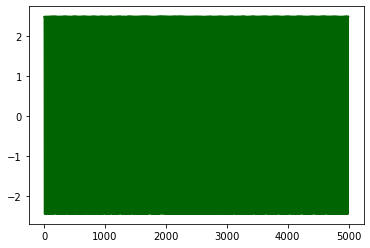

In [6]:
plt.plot(test1.iloc[:,5], c='darkgreen')

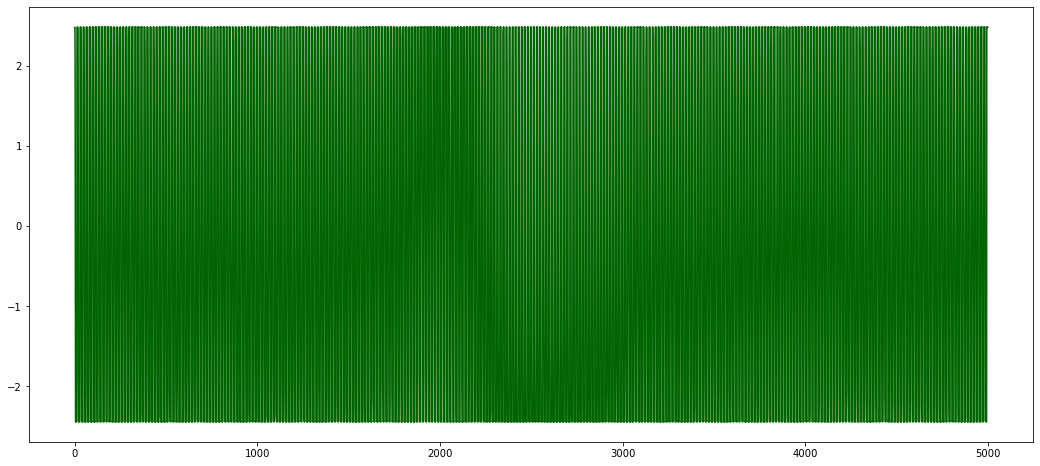

In [7]:
plt.figure(figsize=(18,8))
plt.plot(test1.iloc[:,5], c='darkgreen')
plt.show()

## After LPF

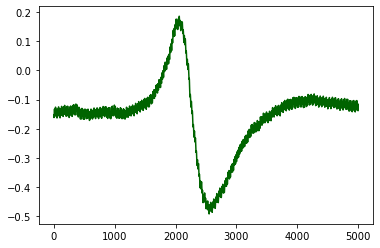

In [8]:
plt.plot(lpf, c='darkgreen')

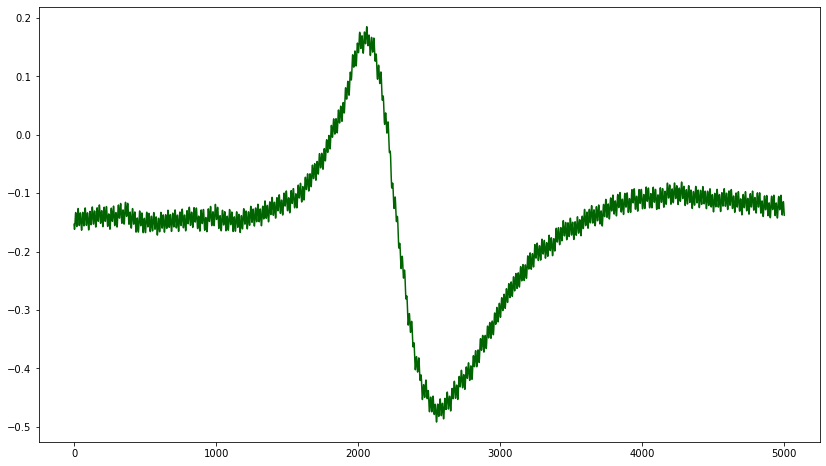

In [10]:
plt.figure(figsize=(14,8))
plt.plot(lpf, c='darkgreen')
plt.show()

## After MA

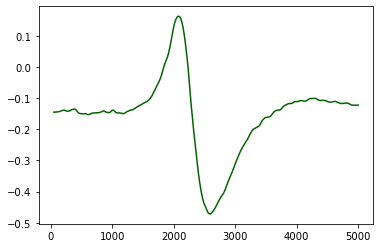

In [11]:
MA = lpf.rolling(window=50).mean()
plt.plot(MA, color='darkgreen')

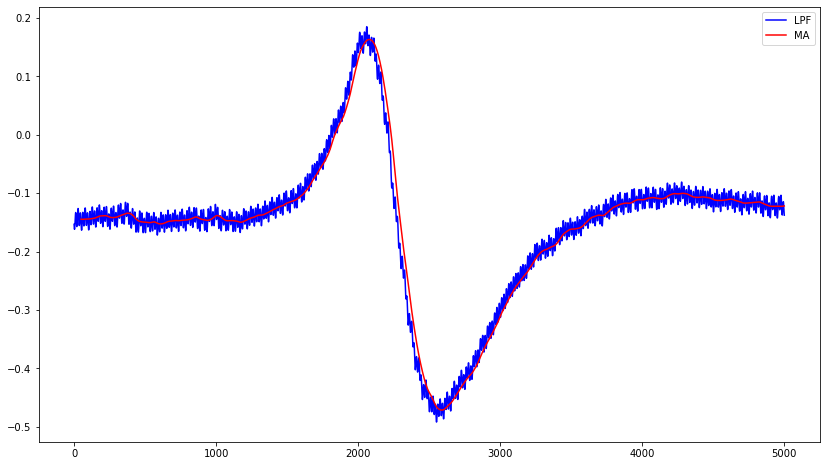

In [26]:
plt.figure(figsize=(14,8))
plt.plot(lpf, color='b',label='LPF')
plt.plot(MA, color='r',label='MA')
plt.legend()
plt.show()

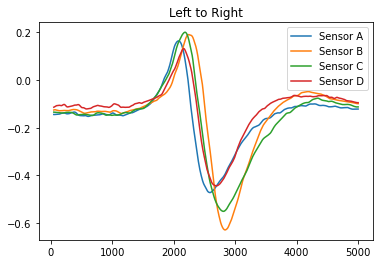

In [48]:
plt.plot(LR.iloc[:,1].rolling(window=50).mean(), label='Sensor A')
plt.plot(LR.iloc[:,2].rolling(window=50).mean(), label='Sensor B')
plt.plot(LR.iloc[:,3].rolling(window=50).mean(), label='Sensor C')
plt.plot(LR.iloc[:,4].rolling(window=50).mean(), label='Sensor D')
plt.title('Left to Right')
plt.legend()
plt.show()


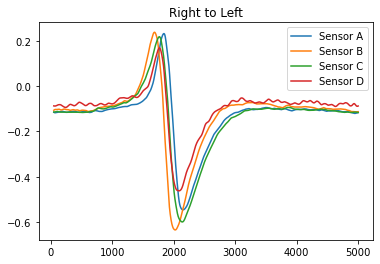

In [49]:
plt.plot(RL.iloc[:,1].rolling(window=50).mean(), label='Sensor A')
plt.plot(RL.iloc[:,2].rolling(window=50).mean(), label='Sensor B')
plt.plot(RL.iloc[:,3].rolling(window=50).mean(), label='Sensor C')
plt.plot(RL.iloc[:,4].rolling(window=50).mean(), label='Sensor D')
plt.title('Right to Left')
plt.legend()
plt.show()

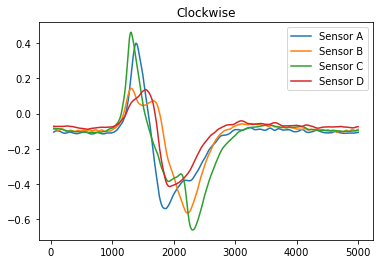

In [50]:
plt.plot(CW.iloc[:,1].rolling(window=50).mean(), label='Sensor A')
plt.plot(CW.iloc[:,2].rolling(window=50).mean(), label='Sensor B')
plt.plot(CW.iloc[:,3].rolling(window=50).mean(), label='Sensor C')
plt.plot(CW.iloc[:,4].rolling(window=50).mean(), label='Sensor D')
plt.title('Clockwise')
plt.legend()
plt.show()

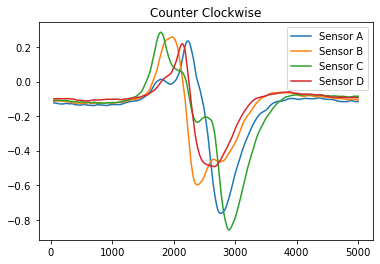

In [51]:
plt.plot(CCW.iloc[:,1].rolling(window=50).mean(), label='Sensor A')
plt.plot(CCW.iloc[:,2].rolling(window=50).mean(), label='Sensor B')
plt.plot(CCW.iloc[:,3].rolling(window=50).mean(), label='Sensor C')
plt.plot(CCW.iloc[:,4].rolling(window=50).mean(), label='Sensor D')
plt.title('Counter Clockwise')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------------
# Demo 3 (Nan, Interpolation)
# --------------------------------------------------------------------------------------------------------


In [85]:
nan_example

,time,A,B,C,D,lpf_A,lpf_B,lpf_C,lpf_D,none
0,10.000,-0.153262,-0.139453,-0.141638,-0.116847,2.476881,2.485887,2.480741,2.485887,0.0
1,10.001,-0.157666,-0.142982,-0.145056,-0.121208,2.478168,2.485887,2.475594,2.484601,0.0
2,10.002,-0.160679,-0.144988,-0.146929,-0.124116,2.479454,2.479454,2.483314,2.484601,0.0
3,10.003,-0.161849,-0.145062,-0.146873,-0.125175,1.753799,1.086041,0.346233,0.375825,0.0
4,10.004,-0.160931,-0.143054,-0.144825,-0.124289,-0.903078,-1.354683,-2.075192,-1.579842,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,14.995,-0.120214,-0.087906,-0.106083,-0.087241,2.485887,2.489747,2.482027,2.485887,0.0
4996,14.996,-0.124869,-0.092477,-0.111460,-0.092796,2.484601,2.478168,2.474308,2.487174,0.0
4997,14.997,-0.129763,-0.097410,-0.116930,-0.098401,2.480741,2.483314,2.479454,2.485887,0.0
4998,14.998,-0.134224,-0.102023,-0.121837,-0.103407,2.476881,2.488461,2.480741,2.485887,0.0


In [91]:
nan_example[nan_example['A'].isnull()]

,time,A,B,C,D,lpf_A,lpf_B,lpf_C,lpf_D,none
2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
nans=nan_example[nan_example['A'].isnull()]
print(nans.shape)

(50, 10)


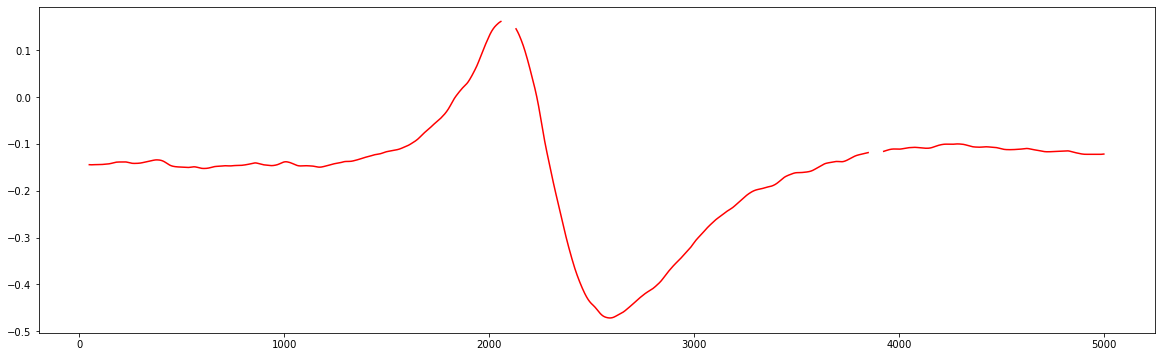

In [12]:
plt.figure(figsize=(20,6))
plt.plot(nan_example_vis.iloc[:,1],c='r')
plt.show()

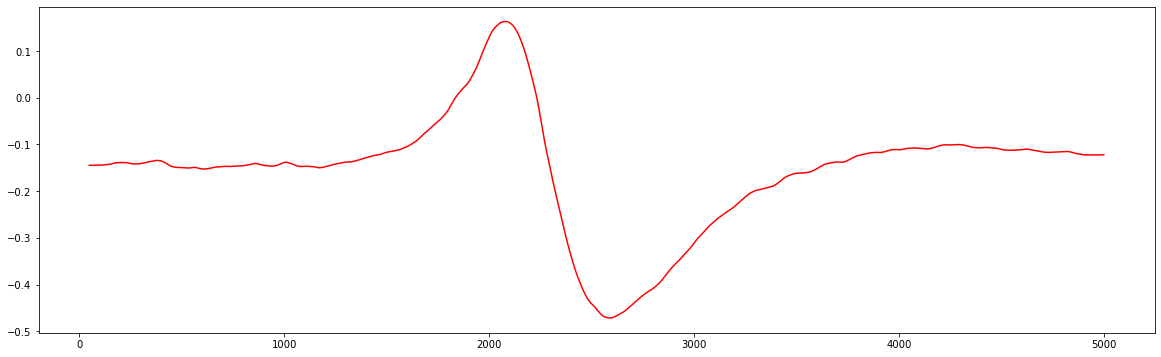

In [13]:
plt.figure(figsize=(20,6))
plt.plot(nan_example_fixed_vis.iloc[:,1],c='r')
plt.show()

# --------------------------------------------------------------------------------------------------------
# Demo 4 (Seasonal_Decompose, Distribution)
# --------------------------------------------------------------------------------------------------------

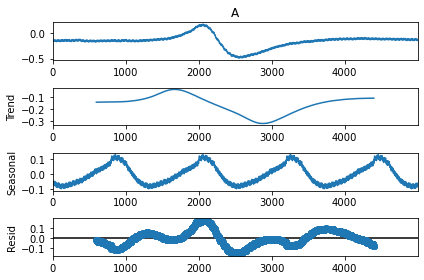

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(LR.iloc[:,1], model='additive', period=1200).plot()

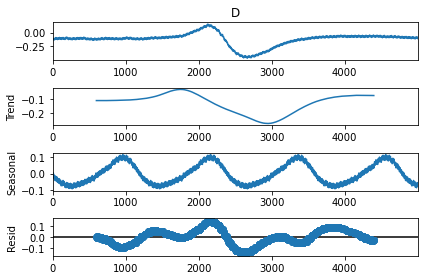

In [21]:
result.plot()
plt.show()

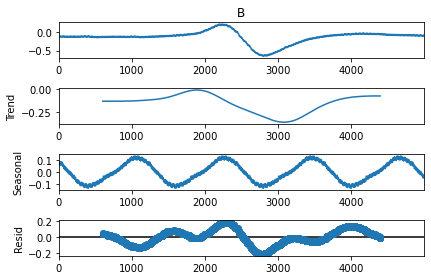

In [24]:
result = seasonal_decompose(LR.iloc[:,2], model='additive', period=1200).plot()

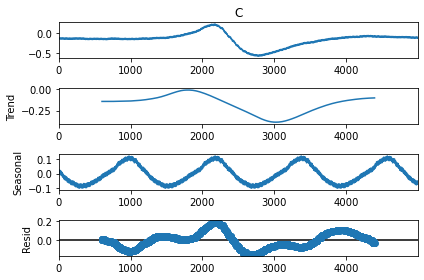

In [28]:
result = seasonal_decompose(LR.iloc[:,3], model='additive', period=1200).plot()

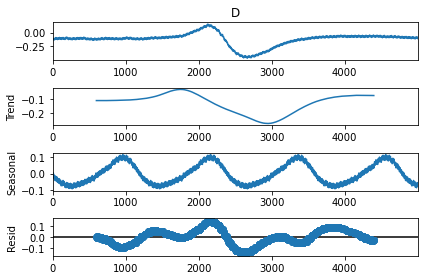

In [29]:
result = seasonal_decompose(LR.iloc[:,4], model='additive', period=1200).plot()

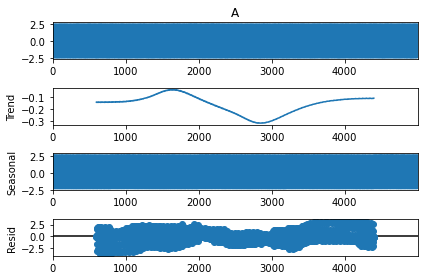

In [34]:
result = seasonal_decompose(LR.iloc[:,5], model='additive', period=1200).plot()

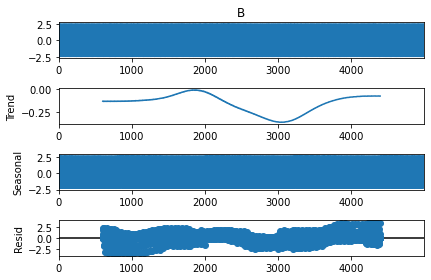

In [35]:
result = seasonal_decompose(LR.iloc[:,6], model='additive', period=1200).plot()

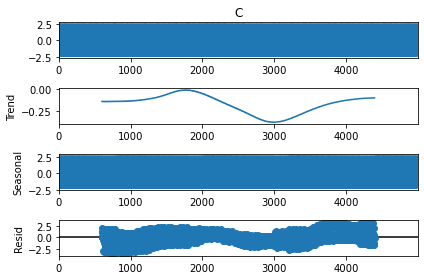

In [36]:
result = seasonal_decompose(LR.iloc[:,7], model='additive', period=1200).plot()

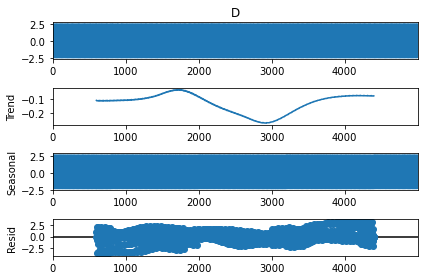

In [37]:
result = seasonal_decompose(LR.iloc[:,8], model='additive', period=1200).plot()

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Distribution of Sensor A~D')]

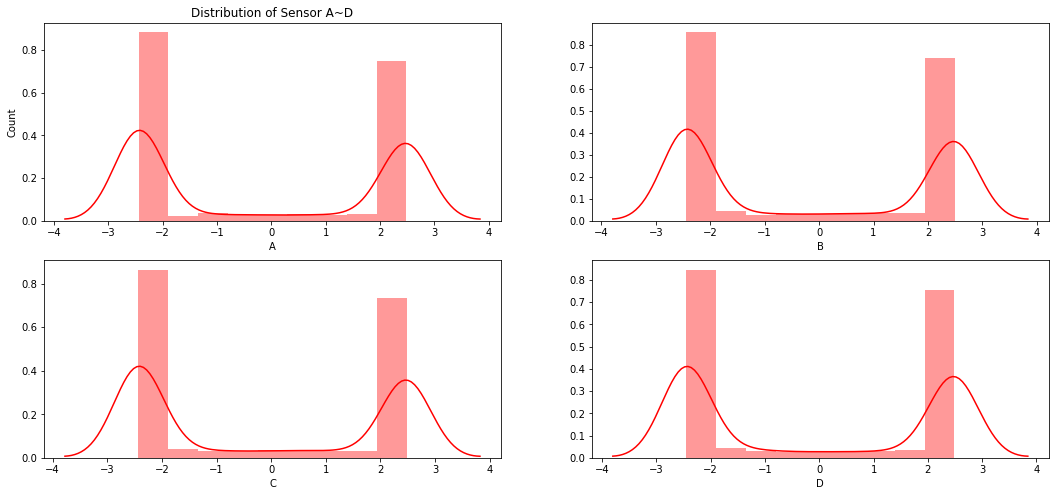

In [16]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.distplot(LR.iloc[:,5], ax=ax1, color='red')
sns.distplot(LR.iloc[:,6], ax=ax2, color='red')
sns.distplot(LR.iloc[:,7], ax=ax3, color='red')
sns.distplot(LR.iloc[:,8], ax=ax4, color='red')

ax1.set(ylabel='Count',title="Distribution of Sensor A~D")

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Distribution of Sensor A~D')]

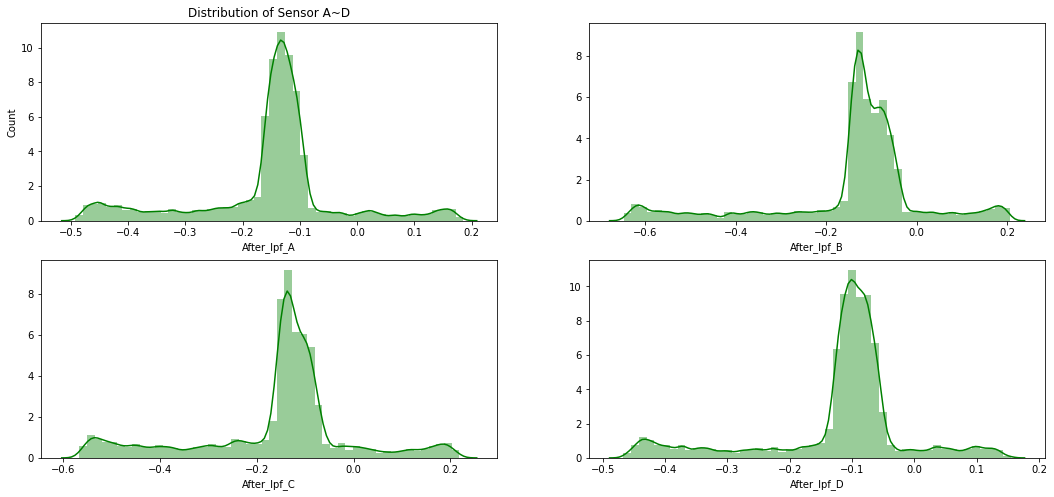

In [18]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.distplot(LR.iloc[:,1], ax=ax1, color='green')
sns.distplot(LR.iloc[:,2], ax=ax2, color='green')
sns.distplot(LR.iloc[:,3], ax=ax3, color='green')
sns.distplot(LR.iloc[:,4], ax=ax4, color='green')

ax1.set(ylabel='Count',title="Distribution of Sensor A~D")

In [30]:
t = [95.83, 98.93, 97.86, 97.50, 96.07, 96.43, 97.86, 98.57, 98.21, 96.67]
np.mean(t)

97.393